In [1]:
!pip install gradio

In [2]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers, datasets
import numpy as np
import matplotlib.pyplot as plt
import gradio as gr

In [3]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

In [4]:
# Set a random seed for reproducibility
tf.random.set_seed(42)

In [5]:
# --- 1. Load and Prepare the Data ---
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [6]:
# --- 2. Build the CNN Model ---
model = keras.Sequential([
    data_augmentation,
    
    # The input_shape is defined for 32x32 pixel images with 3 color channels
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    # The dense layer's input shape is determined by the output of the Flatten layer
    # on a 32x32 image.
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10)
])

C:\Users\asus\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
# --- 3. Compile the Model ---
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
# --- 4. Train the Model ---
print("--- Training the CNN model ---")
history = model.fit(x_train, y_train, epochs=30,validation_data=(x_test, y_test))

--- Training the CNN model ---
Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 33ms/step - accuracy: 0.2646 - loss: 1.9732 - val_accuracy: 0.4799 - val_loss: 1.4191
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.4426 - loss: 1.5461 - val_accuracy: 0.5345 - val_loss: 1.2689
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 34ms/step - accuracy: 0.4829 - loss: 1.4396 - val_accuracy: 0.5684 - val_loss: 1.1929
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.5088 - loss: 1.3808 - val_accuracy: 0.5876 - val_loss: 1.1477
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.5287 - loss: 1.3281 - val_accuracy: 0.5942 - val_loss: 1.1326
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.5416 - loss: 1.2877 - val_accuracy: 0.6091 - val_loss: 1.0848
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.5541 - loss: 1.2667 - val_accuracy: 0.6028 - val_loss: 1.1157
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s

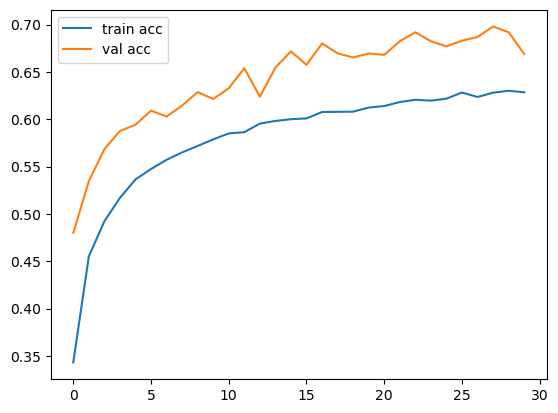

In [10]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


In [11]:
# --- 5. Evaluate the Model ---
print("\n--- Evaluating the model ---")
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")


--- Evaluating the model ---
313/313 - 2s - 6ms/step - accuracy: 0.6690 - loss: 0.9634

Test accuracy: 0.6690


In [12]:
def classify_image(input_image):
    """
    Takes a user-uploaded image from Gradio, preprocesses it,
    and returns the CNN model's predictions with probabilities.
    """
    # --- Step 1: Convert and resize ---
    # Resize to the same shape as CIFAR-10 (32x32, 3 channels)
    img_resized = tf.image.resize(input_image, [32, 32])

    # --- Step 2: Normalize pixel values (0-255 → 0-1) ---
    img_normalized = img_resized / 255.0

    # --- Step 3: Add batch dimension (1, 32, 32, 3) ---
    img_batch = np.expand_dims(img_normalized, axis=0)

    # --- Step 4: Predict using the trained model ---
    prediction_logits = model.predict(img_batch)

    # --- Step 5: Convert logits to probabilities using Softmax ---
    probabilities = tf.nn.softmax(prediction_logits[0]).numpy()

    # --- Step 6: Map probabilities to class names ---
    confidences = {class_names[i]: float(probabilities[i]) for i in range(10)}

    # --- Step 7: Return result ---
    return confidences

In [13]:
# Launch the Gradio interface
print("\n--- Launching Gradio Interface ---")
iface = gr.Interface(
    fn=classify_image,
    inputs=gr.Image(label="Upload an image to classify"),
    outputs=gr.Label(num_top_classes=10, label="Top Predictions"),
    title="CIFAR-10 Image Classifier",
    description="Upload any image, and this CNN model will classify it into one of 10 categories."
)

iface.launch()


--- Launching Gradio Interface ---
* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
